In [1]:
from sklearn import metrics
from sklearn import tree,svm,neighbors,ensemble
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.model_selection import GridSearchCV,train_test_split,cross_val_score,cross_val_predict
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pltl

In [2]:
#数据集包括有13个特征值
data=pd.read_excel('data_depression.xlsx',sheet_name='抑郁脑电图',usecols=[3,4,9,10,11,12],skiprows=[0,1])

data.info()
print(data.head())
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1748 entries, 0 to 1747
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 3  92 non-null     float64
 1   Unnamed: 4  1748 non-null   object 
 2   δ 节律        1748 non-null   float64
 3   θ 节律        1748 non-null   float64
 4   α 节律        1748 non-null   float64
 5   β(LF)节律     1748 non-null   float64
dtypes: float64(5), object(1)
memory usage: 82.1+ KB
   Unnamed: 3 Unnamed: 4  δ 节律  θ 节律  α 节律  β(LF)节律
0        18.0     FP1-A1  64.6  10.1  12.5      6.2
1         NaN     FP2-A2  62.2  11.8  12.0      6.2
2         NaN      F3-A1  43.9  12.6  23.3      9.5
3         NaN      F4-A2  43.8  12.6  22.2      9.5
4         NaN      FZ-A2  41.8  13.7  24.1      8.8


,Unnamed: 3,δ 节律,θ 节律,α 节律,β(LF)节律
count,92.000000,1748.000000,1748.000000,1748.000000,1748.000000
mean,16.467391,40.106751,11.245023,35.391018,6.161499
std,4.902233,21.526848,5.323213,19.515343,3.731613
min,7.000000,2.400000,0.600000,1.300000,0.200000
25%,12.750000,22.400000,7.500000,20.275000,3.800000
50%,16.000000,36.500000,10.500000,33.400000,5.300000
75%,19.250000,53.825000,14.000000,49.100000,7.700000
max,30.000000,97.400000,39.300000,87.100000,27.700000


In [3]:
class_temp=data.iloc[:,0]
k=0;
j=0;
for i in np.arange(0,1748,19):
    if class_temp[i]>17.0:
        k=k+1
    elif class_temp[i]<=17.0:
        j=j+1
print("抑郁症的人数为：",k)
print("正常的人数为：",j)

抑郁症的人数为： 34
正常的人数为： 58


In [4]:
class_temp=data.iloc[:,0]
class_temp

0       18.0
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
1743     NaN
1744     NaN
1745     NaN
1746     NaN
1747     NaN
Name: Unnamed: 3, Length: 1748, dtype: float64

In [5]:
class_temp=data.iloc[:,0]
label,grade=[],[]
#处理标签
for i in np.arange(0,1748,19):
    if class_temp[i]>17.0:
        label.append(1)
    else:
        label.append(0)
    grade.append(class_temp[i])
#处理特征
data_temp=data.iloc[:,[2,3,4,5]]
data_1=[]
for i in np.arange(0,1748,19):
    for i in range(i,i+19):
        data_1=data_1+list(data_temp.iloc[i,:])
    if i==18:
        data_1=np.array(data_1)
        data_2=data_1
    else:
        data_2=np.vstack((data_2,data_1))
    data_1=[]
#转为dataframe格式
data_final=pd.DataFrame(list(data_2))
data_final.head()

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
0,64.6,10.1,12.5,6.2,62.2,11.8,12.0,6.2,43.9,12.6,...,20.5,10.7,32.3,9.0,35.1,11.7,29.1,9.0,36.8,13.0
1,73.3,10.1,11.8,2.8,77.8,8.3,9.5,2.5,48.0,19.1,...,13.4,7.8,15.2,9.2,63.9,8.6,36.1,9.2,44.9,5.8
2,26.0,15.3,42.4,7.0,31.3,13.4,36.1,6.8,17.0,18.4,...,37.1,12.0,19.9,12.1,48.6,12.5,9.0,9.9,66.5,8.7
3,83.3,9.1,4.1,1.8,82.5,9.0,4.3,1.9,80.4,10.2,...,5.1,3.3,80.7,8.5,5.3,2.4,76.3,9.0,6.8,3.3
4,17.3,9.1,66.4,4.4,22.4,8.2,63.0,4.2,17.9,7.8,...,29.0,16.4,10.8,7.2,68.6,5.9,15.3,7.5,69.8,5.2


In [6]:
# 方法选择,使用网格搜索的最佳参数
# 1.决策树回归
model_decision_tree_regression = tree.DecisionTreeRegressor(max_depth=1)
 
# 2.线性回归
model_linear_regression = LinearRegression()
 
# 3.kNN回归
model_k_neighbor = neighbors.KNeighborsRegressor(n_neighbors=6)
 
# 4.随机森林回归
model_random_forest_regressor = ensemble.RandomForestRegressor((n_estimators=24) ) # 使用24个决策树

In [15]:
print(model_decision_tree_regression)
print(model_linear_regression)
print(model_k_neighbor)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=1,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                    weights='uniform')


In [7]:
def try_different_method(model, method):
#     model.fit(train_X, train_Y)
#     pred1 = model.predict(test_X)
#     mse=metrics.mean_squared_error(test_Y,pred1)
#使用交叉验证的方法评估模型
    pred1=cross_val_predict(model,data_final,grade,cv=10)
    sc = -cross_val_score(model,data_final,grade,scoring = "neg_mean_squared_error",cv=10)
    mse=sc.mean()
    plt.figure()
    plt.title(f"method:{method}---MSE:{mse}")
    plt.plot(np.arange(len(grade)), grade, "go-", label="True value")
    plt.plot(np.arange(len(pred1)), pred1, "ro-", label="Predict value")
    plt.xlim([-1.0, 20.0])
    plt.ylim([-1.0, 40.0])

    plt.legend(loc="best")
    plt.show()

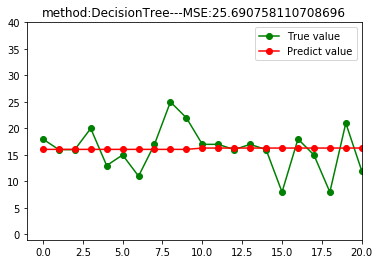

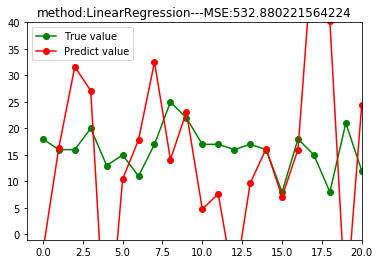

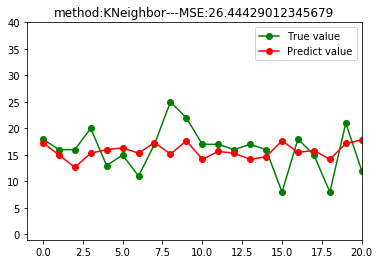

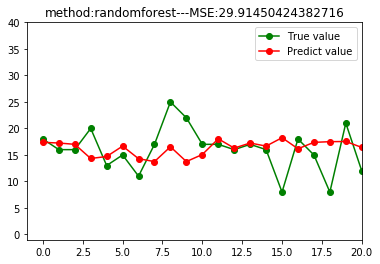

In [8]:
try_different_method(model_decision_tree_regression,"DecisionTree")
try_different_method(model_linear_regression,"LinearRegression")
try_different_method(model_k_neighbor,"KNeighbor")
try_different_method(model_random_forest_regressor,"randomforest")

In [10]:
param_grid={
    "n_neighbors":[i for i in range(1,10)]
}
model2=neighbors.KNeighborsRegressor()
grid=GridSearchCV(model2,param_grid=param_grid,cv=10)
grid.fit(data_final,grade)
print(grid.best_score_,grid.best_estimator_)

-0.7168425604367841 KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                    weights='uniform')


In [11]:
param_grid={
    "max_depth":[i for i in range(1,10)],
}
model2=tree.DecisionTreeRegressor()
grid=GridSearchCV(model2,param_grid=param_grid,cv=10)
grid.fit(data_final,grade)
print(grid.best_score_,grid.best_estimator_)

-0.7478364862189002 DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=1,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')


In [12]:
param_grid={
    "n_estimators":[i for i in range(1,50)],
}
model2=ensemble.RandomForestRegressor()
grid=GridSearchCV(model2,param_grid=param_grid,cv=10)
grid.fit(data_final,grade)
print(grid.best_score_,grid.best_estimator_)

-0.8720294931861405 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=41, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)


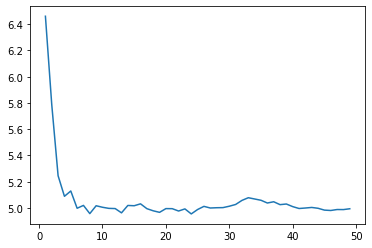

In [13]:
#寻找最优的参数，k近邻
score = []
alphas = []
for alpha in range(1,50,1):
    alphas.append(alpha)
    rdg = neighbors.KNeighborsRegressor(alpha)
    sc = np.sqrt( -cross_val_score(rdg,data_final,grade,scoring = "neg_mean_squared_error",cv=10))
    score.append(sc.mean())
pltl.plot(alphas,score)
pltl.show()

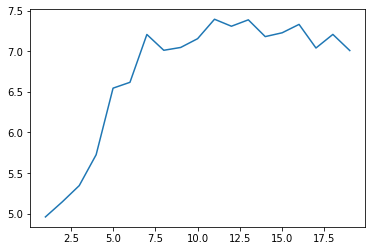

In [14]:
#寻找最优的参数，决策树
score = []
alphas = []
for alpha in range(1,20,1):
    alphas.append(alpha)
    rdg = tree.DecisionTreeRegressor(max_depth=alpha)
    sc = np.sqrt( -cross_val_score(rdg,data_final,grade,scoring = "neg_mean_squared_error",cv=10))
    score.append(sc.mean())
pltl.plot(alphas,score)
pltl.show()